# Predicting House Prices

Housing data from California.

Goals:
+ Model the relationship between house prices and various factors.
    + Be familiar with model validation.
+ LinearRegression
+ DecisionTreeRegressor
+ RandomForestRegressor

In [1]:
import pandas, seaborn
df = pandas.read_csv('../Datasets/cali_housing.csv')

Investigate pairwise correlations between house prices and each attribute.



In [2]:
df.sample(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5071,-118.31,33.99,49,857,196.0,694,228,2.8950,108000,<1H OCEAN
7632,-118.29,33.84,33,896,208.0,843,200,3.5000,183000,<1H OCEAN
2701,-115.57,32.85,33,1365,269.0,825,250,3.2396,62300,INLAND


### Questions

+ What is the target variable?  median_house_value
+ 

<AxesSubplot:>

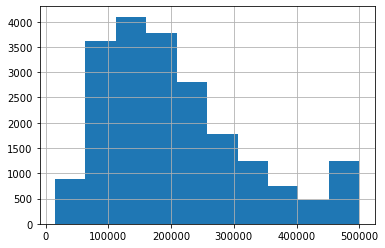

In [3]:
df.median_house_value.hist()

In [4]:
df.median_house_value.describe(), df.median_house_value.median()

(count     20640.000000
 mean     206855.816909
 std      115395.615874
 min       14999.000000
 25%      119600.000000
 50%      179700.000000
 75%      264725.000000
 max      500001.000000
 Name: median_house_value, dtype: float64,
 179700.0)

In [5]:
df.median_house_value.median(), df.median_house_value.mean()

(179700.0, 206855.81690891474)

In [6]:
v = [1,2,3,4,5,6,7,8,9,100000]

<AxesSubplot:>

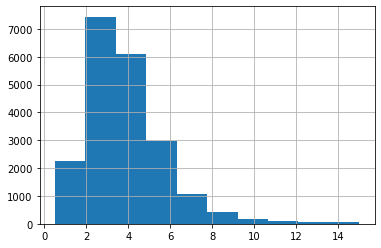

In [7]:
df.median_income.hist()

In [8]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### Where are these island houses? How much?

In [9]:
island_houses = df[ df.ocean_proximity == 'ISLAND']

In [10]:
island_houses

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8314,-118.32,33.35,27,1675,521.0,744,331,2.1579,450000,ISLAND
8315,-118.33,33.34,52,2359,591.0,1100,431,2.8333,414700,ISLAND
8316,-118.32,33.33,52,2127,512.0,733,288,3.3906,300000,ISLAND
8317,-118.32,33.34,52,996,264.0,341,160,2.7361,450000,ISLAND
8318,-118.48,33.43,29,716,214.0,422,173,2.6042,287500,ISLAND


### Let's see what this looks like

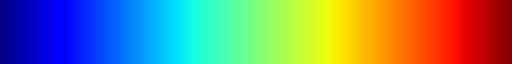

In [11]:
from matplotlib import pyplot
pyplot.get_cmap('jet')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

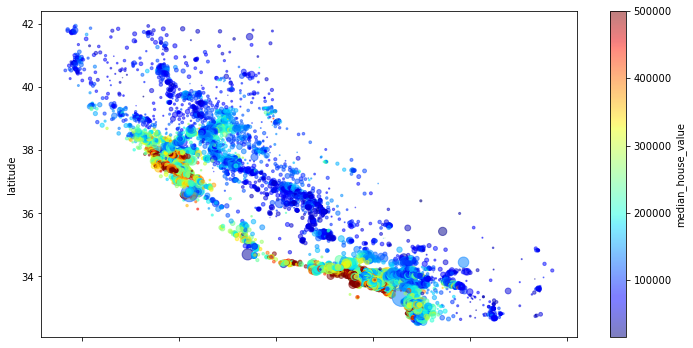

In [12]:
df.plot.scatter(x='longitude', 
                y='latitude',
                c='median_house_value',
                s=df.population/100,
                alpha=0.5,
                cmap = pyplot.get_cmap('jet'),
                figsize=(12,6))

# Linear Model

In [13]:
df.sample(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
59,-122.29,37.82,2,158,43.0,94,57,2.5625,60000,NEAR BAY
11692,-117.99,33.87,34,1239,307.0,869,291,3.5900,161900,<1H OCEAN
19051,-121.81,38.43,30,1674,297.0,756,292,3.9286,133100,INLAND


In [ ]:
y = df.median_house_value
df['rooms_per_household'] = df['total_rooms'] / df['households']

In [ ]:
X = df[['median_income','housing_median_age','longitude','latitude','rooms_per_household']]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, ShuffleSplit

In [ ]:
model = LinearRegression()
model.fit(X,y)

In [ ]:
results = cross_validate(model, X, y, cv=ShuffleSplit(n_splits=200))
results['test_score'].mean().round(3)

Will total bedrooms improve the model's prediction?

Will proximity to the ocean improve the model's prediction?

### Is total_bedroom a good feature?

In [19]:
df.isna().sum(), len(df)

(longitude                0
 latitude                 0
 housing_median_age       0
 total_rooms              0
 total_bedrooms         207
 population               0
 households               0
 median_income            0
 median_house_value       0
 ocean_proximity          0
 rooms_per_household      0
 dtype: int64,
 20640)

There's missing data in the total_bedrooms feature.  We'll remove the missing data.

In [20]:
df2 = df.dropna()
df2.isna().sum(), len(df2)

(longitude              0
 latitude               0
 housing_median_age     0
 total_rooms            0
 total_bedrooms         0
 population             0
 households             0
 median_income          0
 median_house_value     0
 ocean_proximity        0
 rooms_per_household    0
 dtype: int64,
 20433)

In [21]:
y = df2.median_house_value
X = df2[['median_income','housing_median_age','longitude','latitude',
        'rooms_per_household','total_bedrooms']]
model = LinearRegression()
model.fit(X,y)
results = cross_validate(model, X, y, cv=ShuffleSplit(n_splits=200))
results['test_score'].mean().round(3)

0.604

In [22]:
# from matplotlib import pyplot

# df.plot.scatter(
#     x='longitude', 
#     y='latitude', 
#     s=df['population']/100, 
#     c='median_house_value',
#     alpha=0.2, 
#     figsize=(14,8),
#     cmap=pyplot.get_cmap('jet'),
# )

# dt4 = tree.DecisionTreeClassifier(max_depth=4)
# dt4.fit(X, y)
# df = pandas.read_csv('../Datasets/iris.csv')
# X = df[['SepalWidth','SepalLength','PetalWidth','PetalLength']]
# y, species_names = pandas.factorize(df.Species)
# viz = dtreeviz(dt4, X, y,
# #                target_name='Species',
#                feature_names=X.columns, class_names=list(species_names),
#                fancy=True)  
# viz.view() 


#### Will proximity to the ocean improve the model's prediction?

In [23]:
df2['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [24]:
y = df2.median_house_value
X = df2[['median_income','housing_median_age','longitude','latitude',
        'rooms_per_household','total_bedrooms','ocean_proximity']]
model = LinearRegression()
# model.fit(X,y)
# results = cross_validate(model, X, y, cv=ShuffleSplit(n_splits=200))
# results['test_score'].mean().round(3)

ocean_proximity is a categorical variable. We need to convert that into numerical variables.

In [25]:
a, b = df2.ocean_proximity.factorize()
df2['ocean_proximity'] = a

/var/folders/b5/d9dklfjj6jsdgbt3rxf0_lyh0000gn/T/ipykernel_94277/493456677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ocean_proximity'] = a


In [26]:
df2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,6.984127
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,6.238137
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,8.288136
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,5.817352
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,6.281853
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,2,5.045455
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,2,6.114035
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,2,5.205543
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,2,5.329513


In [27]:
df2 = df.dropna()
a, b = df2.ocean_proximity.factorize()
df2['ocean_proximity'] = a
y = df2.median_house_value
X = df2[['median_income','housing_median_age','longitude','latitude',
        'rooms_per_household','total_bedrooms','ocean_proximity']]
model = LinearRegression()
model.fit(X,y)
results = cross_validate(model, X, y, cv=ShuffleSplit(n_splits=200))
results['test_score'].mean().round(3)

/var/folders/b5/d9dklfjj6jsdgbt3rxf0_lyh0000gn/T/ipykernel_94277/1035574377.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ocean_proximity'] = a


0.602

In [28]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [29]:
df2.ocean_proximity.value_counts()

1    9034
2    6496
3    2628
0    2270
4       5
Name: ocean_proximity, dtype: int64

In [30]:
df3 = df.dropna()
df4 = pandas.get_dummies(df3)


In [31]:
df4

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,6.984127,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,6.238137,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,8.288136,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,5.817352,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,6.281853,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,5.045455,0,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,6.114035,0,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,5.205543,0,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,5.329513,0,1,0,0,0


#### Using all features

In [43]:
df = pandas.read_csv('../../Datasets/cali_housing.csv')
df = df.dropna()
df = pandas.get_dummies(df)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0


In [47]:
y = df.median_house_value
X = df.drop(columns=['median_house_value'])
model = LinearRegression()
results = cross_validate(model, X, y, cv=ShuffleSplit(n_splits=100))
results['test_score'].mean().round(3)

0.645

#### Narrow down the location

In [51]:
df.corr().round(2).loc['median_house_value']

longitude                    -0.05
latitude                     -0.14
housing_median_age            0.11
total_rooms                   0.13
total_bedrooms                0.05
population                   -0.03
households                    0.06
median_income                 0.69
median_house_value            1.00
ocean_proximity_<1H OCEAN     0.26
ocean_proximity_INLAND       -0.48
ocean_proximity_ISLAND        0.02
ocean_proximity_NEAR BAY      0.16
ocean_proximity_NEAR OCEAN    0.14
Name: median_house_value, dtype: float64

In [33]:
# df5 = pandas.get_dummies(df[df.ocean_proximity=='INLAND'].dropna())
# df5 = pandas.get_dummies(df[df.ocean_proximity=='<1H OCEAN'].dropna())
# df5 = pandas.get_dummies(df[df.ocean_proximity=='NEAR OCEAN'].dropna())
df5 = pandas.get_dummies(df[df.ocean_proximity=='NEAR BAY'].dropna())
df5.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,ocean_proximity_NEAR BAY
15880,-122.41,37.75,52,2452,623.0,1932,549,2.3903,236100,4.466302,1
203,-122.23,37.78,52,986,258.0,1008,255,1.4844,119400,3.866667,1
473,-122.29,37.86,50,2485,607.0,1354,563,1.9483,150500,4.413854,1
807,-122.03,37.62,35,2072,352.0,1001,350,4.7109,198700,5.920000,1
9948,-122.33,38.21,33,2017,370.0,949,342,4.6250,228600,5.897661,1


In [64]:
y = df.median_house_value

# using all features
X = df.drop(columns=['median_house_value'])

# using the feature that correlates the most with median_house_value
# X = df[['median_income']]

model = LinearRegression()
results = cross_validate(model, X, y, cv=ShuffleSplit(n_splits=200))
print('R2:', results['test_score'].mean().round(3))

R2: 0.643


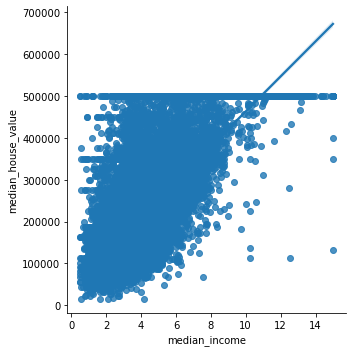

In [65]:
seaborn.lmplot(data=df, x='median_income', y='median_house_value')

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

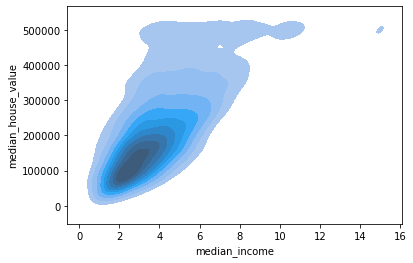

In [69]:
seaborn.kdeplot(data=df, x='median_income', y='median_house_value', fill=True)

<AxesSubplot:>

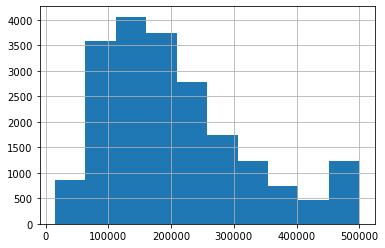

In [68]:
df.median_house_value.hist()